In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ratings.csv', names=['user_id','item_id','rating','titmestamp'])

In [3]:
df.head()

user_id  item_id  rating  titmestamp
0        1      296     5.0  1147880044
1        1      306     3.5  1147868817
2        1      307     5.0  1147868828
3        1      665     5.0  1147878820
4        1      899     3.5  1147868510

In [4]:
movie_titles = pd.read_csv('movies.csv')
movie_titles.head()

item_id                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
df = pd.merge(df, movie_titles, on='item_id')
df.head()

user_id  item_id  rating  titmestamp                title  \
0        1      296     5.0  1147880044  Pulp Fiction (1994)   
1        3      296     5.0  1439474476  Pulp Fiction (1994)   
2        4      296     4.0  1573938898  Pulp Fiction (1994)   
3        5      296     4.0   830786155  Pulp Fiction (1994)   
4        7      296     4.0   835444730  Pulp Fiction (1994)   

                        genres  
0  Comedy|Crime|Drama|Thriller  
1  Comedy|Crime|Drama|Thriller  
2  Comedy|Crime|Drama|Thriller  
3  Comedy|Crime|Drama|Thriller  
4  Comedy|Crime|Drama|Thriller

In [6]:
df.describe()

user_id       item_id        rating    titmestamp
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06
mean   3.575093e+03  2.119202e+04  3.535808e+00  1.209524e+09
std    2.016420e+03  3.911993e+04  1.056276e+00  2.300684e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    1.843000e+03  1.148000e+03  3.000000e+00  9.999707e+08
50%    3.609000e+03  2.858000e+03  3.500000e+00  1.183782e+09
75%    5.322000e+03  8.464000e+03  4.000000e+00  1.446632e+09
max    7.045000e+03  2.091630e+05  5.000000e+00  1.574288e+09

First milestone

In [7]:
rate = pd.DataFrame(df.groupby('title')['rating'].mean())
rate.head()

rating
title                                     
"Great Performances" Cats (1998)  3.541667
#realityhigh (2017)               3.000000
$ (Dollars) (1971)                4.000000
$5 a Day (2008)                   3.666667
$9.99 (2008)                      2.666667

In [8]:
rate['number_of_ratings'] = df.groupby('title')['rating'].count()
rate.head()

rating  number_of_ratings
title                                                        
"Great Performances" Cats (1998)  3.541667                 12
#realityhigh (2017)               3.000000                  1
$ (Dollars) (1971)                4.000000                  1
$5 a Day (2008)                   3.666667                  3
$9.99 (2008)                      2.666667                  3

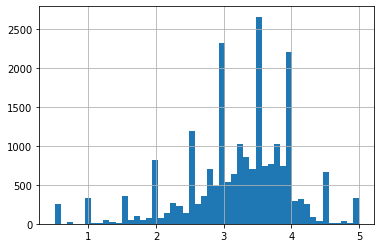

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
rate['rating'].hist(bins=50)

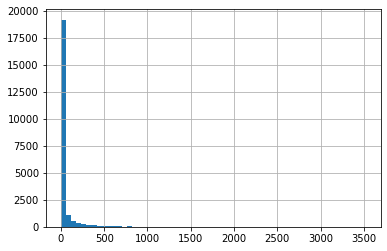

In [10]:
rate['number_of_ratings'].hist(bins=60)

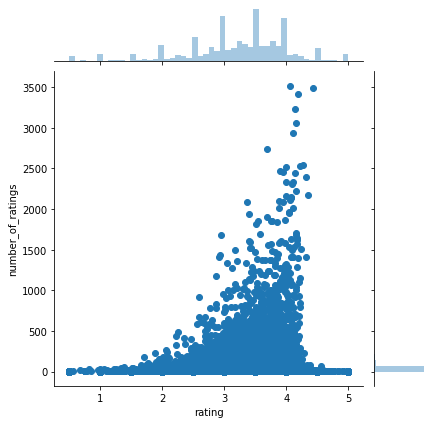

In [11]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=rate)

In [12]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix.head()

title    "Great Performances" Cats (1998)  #realityhigh (2017)  \
user_id                                                          
1                                     NaN                  NaN   
2                                     NaN                  NaN   
3                                     NaN                  NaN   
4                                     NaN                  NaN   
5                                     NaN                  NaN   

title    $ (Dollars) (1971)  $5 a Day (2008)  $9.99 (2008)  '71 (2014)  \
user_id                                                                  
1                       NaN              NaN           NaN         NaN   
2                       NaN              NaN           NaN         NaN   
3                       NaN              NaN           NaN         NaN   
4                       NaN              NaN           NaN         NaN   
5                       NaN              NaN           NaN         NaN   

title    'Hellboy': The Seeds of Creation (2004)  \
user_id                                            
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                            NaN   

title    'Neath the Arizona Skies (1934)  'R Xmas (2001)  \
user_id                                                    
1                                    NaN             NaN   
2                                    NaN             NaN   
3                                    NaN             NaN   
4                                    NaN             NaN   
5                                    NaN             NaN   

title    'Round Midnight (1986)  ...  Когда зажигаются ёлки (1950)  \
user_id                          ...                                 
1                           NaN  ...                           NaN   
2                           NaN  ...                           NaN   
3                           NaN  ...                           NaN   
4                           NaN  ...                           NaN   
5                           NaN  ...                           NaN   

title    Ландыш серебристый (2000)  Мартынко (1987)  Мафия (2016)  Начальник  \
user_id                                                                        
1                              NaN              NaN           NaN        NaN   
2                              NaN              NaN           NaN        NaN   
3                              NaN              NaN           NaN        NaN   
4                              NaN              NaN           NaN        NaN   
5                              NaN              NaN           NaN        NaN   

title    Обезьянки и грабители (1985)  Он вам не Димон (2017)  \
user_id                                                         
1                                 NaN                     NaN   
2                                 NaN                     NaN   
3                                 NaN                     NaN   
4                                 NaN                     NaN   
5                                 NaN                     NaN   

title    Приключения Домовёнка (1986)  Принцесса и Людоед (1977)  \
user_id                                                            
1                                 NaN                        NaN   
2                                 NaN                        NaN   
3                                 NaN                        NaN   
4                                 NaN                        NaN   
5                                 NaN                        NaN   

title    Я худею (2018)  
user_id                  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
5                   NaN  

[5 rows x 22226 columns]

In [13]:
rate.sort_values('number_of_ratings', ascending=False).head(10)

rating  number_of_ratings
title                                                                 
Forrest Gump (1994)                        4.057987               3518
Shawshank Redemption, The (1994)           4.436067               3488
Pulp Fiction (1994)                        4.182417               3418
Silence of the Lambs, The (1991)           4.131546               3227
Matrix, The (1999)                         4.160738               3064
Star Wars: Episode IV - A New Hope (1977)  4.101160               2931
Jurassic Park (1993)                       3.687432               2745
Schindler's List (1993)                    4.276031               2545
Fight Club (1999)                          4.226285               2530
Braveheart (1995)                          3.997417               2516

In [14]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In [15]:
AFO_user_rating.head()
contact_user_rating.head()

user_id
1    NaN
2    5.0
3    4.0
4    NaN
5    NaN
Name: Contact (1997), dtype: float64

In [19]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)

In [21]:
similar_to_air_force_one.head()

title
"Great Performances" Cats (1998)   NaN
#realityhigh (2017)                NaN
$ (Dollars) (1971)                 NaN
$5 a Day (2008)                    NaN
$9.99 (2008)                       NaN
dtype: float64

In [22]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

In [23]:
similar_to_contact.head()

title
"Great Performances" Cats (1998)   NaN
#realityhigh (2017)                NaN
$ (Dollars) (1971)                 NaN
$5 a Day (2008)                    NaN
$9.99 (2008)                       NaN
dtype: float64

In [25]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

Correlation
title                                   
'71 (2014)                      0.391347
'Til There Was You (1997)       0.476250
'burbs, The (1989)              0.088619
'night Mother (1986)            0.231160
(500) Days of Summer (2009)     0.300564

In [26]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

correlation
title                                   
'71 (2014)                     -0.170732
'Salem's Lot (2004)             0.662541
'Til There Was You (1997)      -0.057692
'burbs, The (1989)              0.097883
(500) Days of Summer (2009)     0.394697

In [28]:
corr_AFO = corr_AFO.join(rate['number_of_ratings'])
corr_contact = corr_contact.join(rate['number_of_ratings'])

In [29]:
corr_AFO .head()

correlation  number_of_ratings
title                                                      
'71 (2014)                     -0.170732                 19
'Salem's Lot (2004)             0.662541                 10
'Til There Was You (1997)      -0.057692                 18
'burbs, The (1989)              0.097883                138
(500) Days of Summer (2009)     0.394697                469

In [30]:
corr_contact.head()

Correlation  number_of_ratings
title                                                      
'71 (2014)                      0.391347                 19
'Til There Was You (1997)       0.476250                 18
'burbs, The (1989)              0.088619                138
'night Mother (1986)            0.231160                 11
(500) Days of Summer (2009)     0.300564                469

In [31]:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

correlation  number_of_ratings
title                                                            
Air Force One (1997)                  1.000000                632
Equalizer, The (2014)                 0.710093                129
How to Train Your Dragon 2 (2014)     0.685716                202
Bourne Legacy, The (2012)             0.684648                143
Ip Man (2008)                         0.677163                124
Split (2017)                          0.675708                126
Ant-Man (2015)                        0.670702                276
Kindergarten Cop (1990)               0.663966                155
The Theory of Everything (2014)       0.661600                197
21 Jump Street (2012)                 0.657199                272

In [32]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

Correlation  number_of_ratings
title                                                               
Contact (1997)                           1.000000                898
With Honors (1994)                       0.576827                128
Man from Earth, The (2007)               0.556167                124
Hacksaw Ridge (2016)                     0.523448                122
Escape to Witch Mountain (1975)          0.521404                113
Alive (1993)                             0.519089                115
Public Enemies (2009)                    0.510446                107
How to Make an American Quilt (1995)     0.495628                128
Boiler Room (2000)                       0.490994                192
Good Night, and Good Luck. (2005)        0.484425                168